In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

In [2]:
a=0.07
R=0.80
delta=3*10**-5
p0=0.8*10**6
q=0.15*10**6
E=200*10**9
σ=240*10**6
Nx=0
μ=0.3

In [3]:
h=p0*R/σ
print (f'\nЗначение h={h} м\n')
h=2*h
print (f'Удвоенное значение h={h} м\n')


Значение h=0.0026666666666666666 м

Удвоенное значение h=0.005333333333333333 м



In [4]:
D=E*h**3/(12*(1-μ**2))
print (f'\nЦилиндрическая жесткость D={D}\n')


Цилиндрическая жесткость D=2778.456111789445



In [5]:
k = (E*h/(4*D*R**2))**(1/4)
print(f'\nВолновое число k={k} м^-1\n')


Волновое число k=19.678695437097804 м^-1



In [6]:
λ=np.pi/k
print (f'\nДлина краевого эффекта λ={λ} м\n')


Длина краевого эффекта λ=0.15964435567549554 м



In [7]:
C=np.array([[0,1],
           [1,1]])

In [8]:
b=np.array([0,-q/(2*D*k**3)])

In [9]:
x = linalg.solve(C, b)
C1=x[0]
C2=x[1]
print(f'\nКоэффициенты C равны:\nC1={C1}\nC2={C2}\n')


Коэффициенты C равны:
C1=-0.0035421651786776073
C2=0.0



In [10]:
def W(x): #Функция прогиба
    return C1*np.exp(-k*x)*np.cos(k*x)+C2*np.exp(-k*x)*np.sin(k*x)+p0*R**2/(E*h)

In [11]:
def φ(x): #Функция углового перемещения
    return -k*np.exp(-k*x)*((C1-C2)*np.cos(k*x)+(C1+C2)*np.sin(k*x))

In [12]:
def Mx(x): #Функция момента Mx
    return 2*k**2*np.exp(-k*x)*D*(C1*np.sin(k*x)-C2*np.cos(k*x))

In [13]:
def My(x): #Функция момента My
    return μ*Mx(x)

In [14]:
def Ny(x): #Функция окружного усиления
    return μ*Nx+E*h/R*W(x)

In [15]:
def Q(x): #Функция поперечной силы Q
    return 2*k**3*D*np.exp(-k*x)*((C1+C2)*np.cos(k*x)-(C1-C2)*np.sin(k*x))

In [16]:
def σx_inner(x): #Функция напряжения σx для внутренней поверхности оболочки
    return Nx/h+6*Mx(x)/h**2

In [17]:
def σx_outer(x): #Функция напряжения σx для внешней поверхности оболочки
    return Nx/h-6*Mx(x)/h**2

In [18]:
def σy_inner(x): #Функция напряжения σy для внутренней поверхности оболочки
    return Ny(x)/h+6*My(x)/h**2

In [19]:
def σy_outer(x):  #Функция напряжения σy для внешней поверхности оболочки
    return Ny(x)/h-6*My(x)/h**2

In [20]:
def σ_eqv_inner(x): #Функция эквивалентного напряжения для внутренней поверхности оболочки
    return np.sqrt(σx_inner(x)**2+σy_inner(x)**2-σx_inner(x)*σy_inner(x))

In [21]:
def σ_eqv_outer(x): #Функция эквивалентного напряжения для внешней поверхности оболочки
    return np.sqrt(σx_outer(x)**2+σy_outer(x)**2-σx_outer(x)*σy_outer(x))

In [22]:
x=np.linspace(0,2*λ,100) 

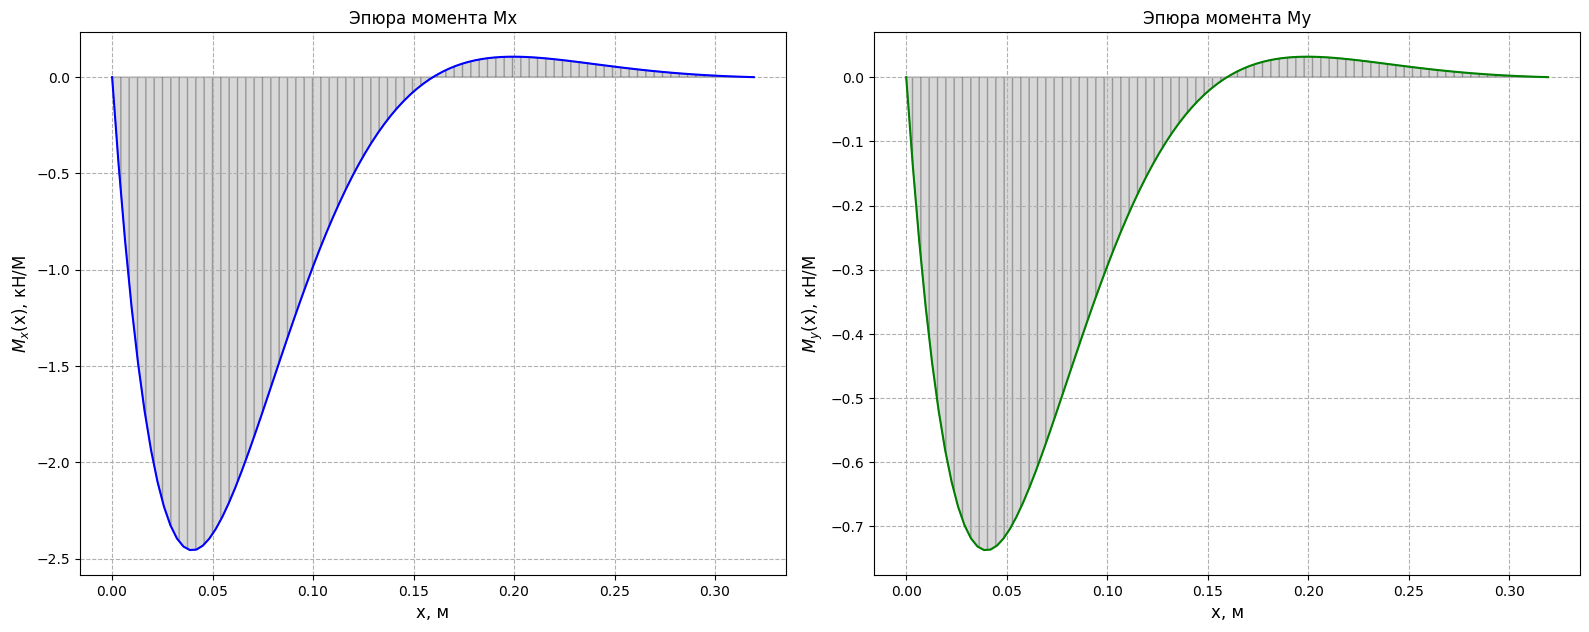

In [35]:
plt.figure(figsize=(16, 12))
colors = ['b', 'g'] 

plt.subplot(2,2,1)

plt.plot(x,Mx(x)/(10**3), color=colors[0])
plt.fill_between(x,Mx(x)/(10**3), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$M_x$(x), кН/М', fontsize=12)
plt.title('Эпюра момента Mx')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.subplot(2, 2,2)

plt.plot(x,My(x)/(10**3),color=colors[1])
plt.fill_between(x,My(x)/(10**3), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$M_y$(x), кН/М', fontsize=12)
plt.title('Эпюра момента My')
plt.grid(True, which="both", ls="--")
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))

plt.tight_layout()
plt.show()

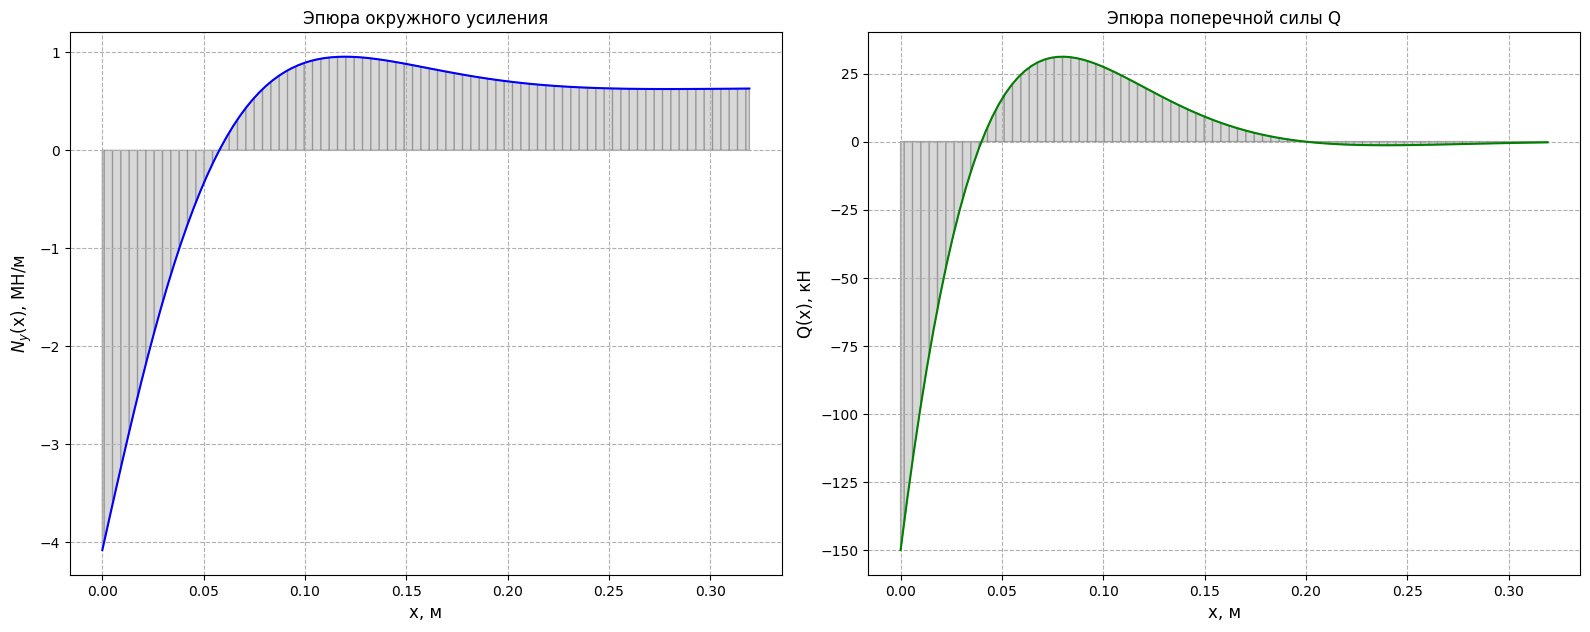

In [24]:
plt.figure(figsize=(16, 12))
colors = ['b', 'g'] 

plt.subplot(2,2,1)

plt.plot(x,Ny(x)/(10**6),color=colors[0])
plt.fill_between(x,Ny(x)/(10**6), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$N_y$(x), МН/м', fontsize=12)
plt.title('Эпюра окружного усиления')
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.grid(True, which="both", ls="--")

plt.subplot(2,2,2)

plt.plot(x,Q(x)/(10**3),color=colors[1])
plt.fill_between(x,Q(x)/(10**3), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('Q(x), кН', fontsize=12)
plt.title('Эпюра поперечной силы Q')
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

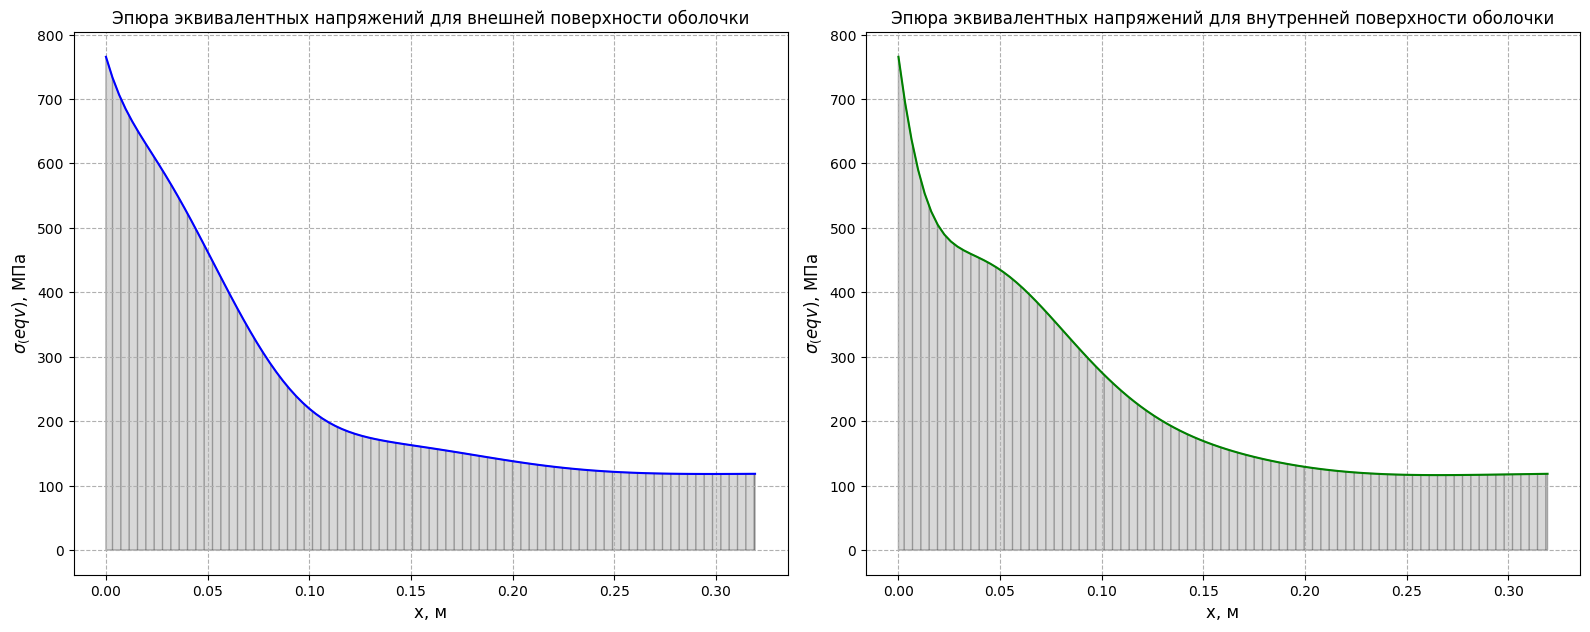

In [25]:
plt.figure(figsize=(16, 12))
colors = ['b', 'g'] 

plt.subplot(2,2,1)

plt.plot(x,σ_eqv_outer(x)/(10**6),color=colors[0])
plt.fill_between(x,σ_eqv_outer(x)/(10**6), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$σ_(eqv)$, МПа', fontsize=12)
plt.title('Эпюра эквивалентных напряжений для внешней поверхности оболочки')
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.grid(True, which="both", ls="--")

plt.subplot(2,2,2)

plt.plot(x,σ_eqv_inner(x)/(10**6),color=colors[1])
plt.fill_between(x,σ_eqv_inner(x)/(10**6), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('$σ_(eqv)$, МПа', fontsize=12)
plt.title('Эпюра эквивалентных напряжений для внутренней поверхности оболочки')
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In [26]:
σ_eqv_inner_max=max(abs(σ_eqv_inner(x)))
σ_eqv_outer_max=max(abs(σ_eqv_outer(x)))

print (f'\nМаксимальное эквивалентное напряжение внутренней поверхности оболочки σ_eqv_inner_max={σ_eqv_inner_max/(10**6)} МПа\n')
print (f'\nМаксимальное эквивалентное напряжение внешней поверхности оболочки σ_eqv_outer_max={σ_eqv_outer_max/(10**6)} МПа\n')


Максимальное эквивалентное напряжение внутренней поверхности оболочки σ_eqv_inner_max=765.5412946694017 МПа


Максимальное эквивалентное напряжение внешней поверхности оболочки σ_eqv_outer_max=765.5412946694017 МПа



In [27]:
if σ_eqv_inner_max > σ_eqv_outer_max:
    n=σ/σ_eqv_inner_max
else:
    n=σ/σ_eqv_outer_max
print (f'\nКоэффициент запаса прочности n={n}\n')


Коэффициент запаса прочности n=0.3135036629260395



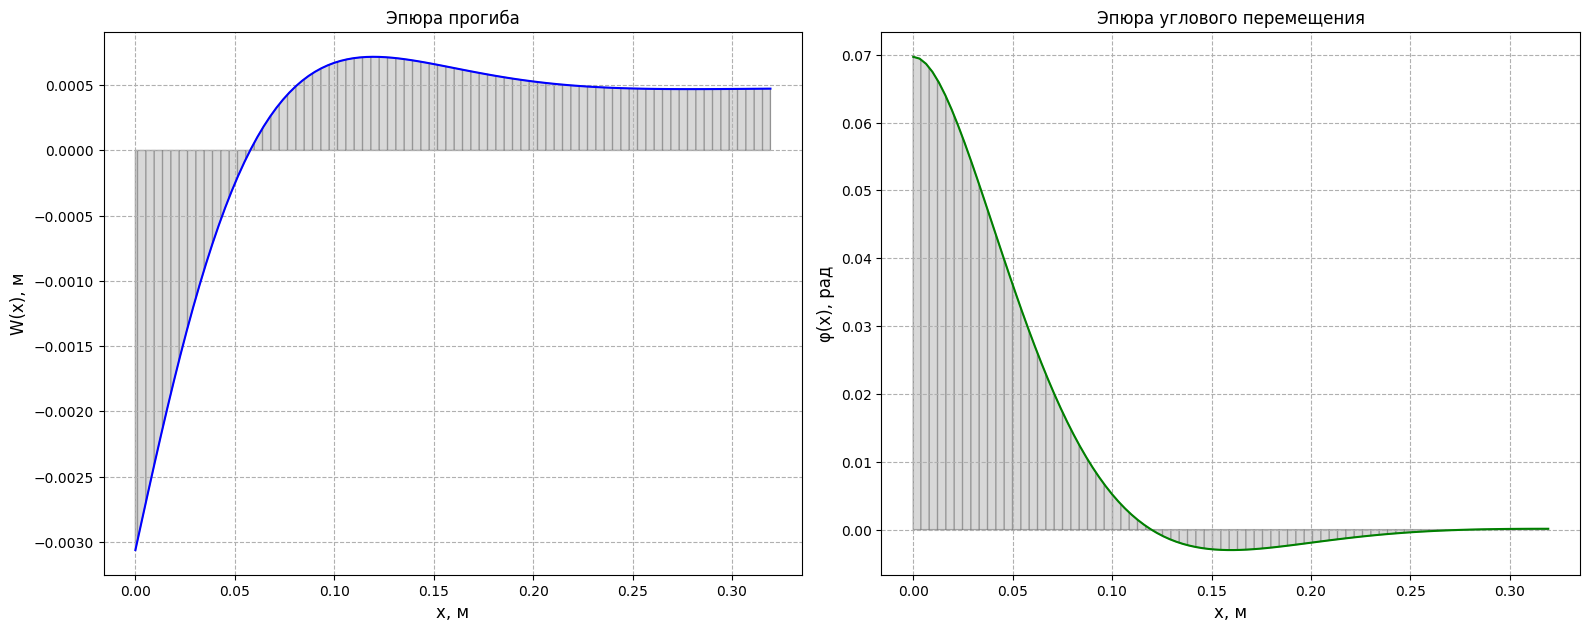

In [28]:
plt.figure(figsize=(16, 12))
colors = ['b', 'g'] 

plt.subplot(2,2,1)

plt.plot(x,W(x),color=colors[0])
plt.fill_between(x,W(x), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('W(x), м', fontsize=12)
plt.title('Эпюра прогиба')
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.grid(True, which="both", ls="--")

plt.subplot(2,2,2)

plt.plot(x,φ(x),color=colors[1])
plt.fill_between(x,φ(x), color='gray',alpha=0.3, hatch='||',edgecolor='black')
plt.xlabel('x, м', fontsize=12)
plt.ylabel('φ(x), рад', fontsize=12)
plt.title('Эпюра углового перемещения')
plt.xticks(np.arange(min(x), max(x)+0.01, 0.05))
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()